In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [4]:
cat = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

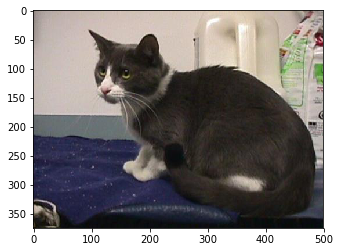

In [5]:
plt.imshow(cat)

In [7]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

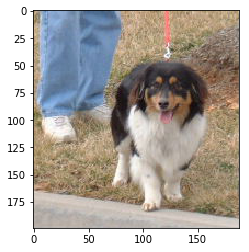

In [8]:
plt.imshow(dog)

In [9]:
cat.shape

(375, 500, 3)

In [10]:
# since we're using raw data (images of different sizes and shapes)
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
# Allows for different variations of the same image to a certain extent

image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

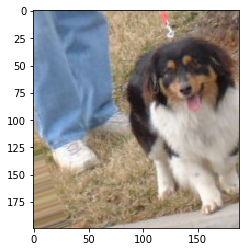

In [12]:
# running this function displays the dog with random adjustments based on the above function
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
input_shape = (150,150,3)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

In [18]:
batch_size = 16

train_img_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [19]:
test_img_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [20]:
# gives the labels
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [21]:
# import warnings
# warnings.filterwarnings('ignore')

# results = model.fit_generator(train_img_gen,epoch=1,steps_per_epoch=150,validation_data*test_img_gen,validation_steps=12)

# results.history['acc']


In [23]:
from keras.models import load_model

new_model = load_model('CV_Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [24]:
dog_file = 'CATS_DOGS/test/DOG/10008.jpg'

In [35]:
from keras.preprocessing import image

dog_img = image.load_img(dog_file,target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [38]:
#plt.imshow(dog_img)

In [39]:
dog_img.shape

(150, 150, 3)

In [40]:
import numpy as np

dog_img = np.expand_dims(dog_img,axis=0)

In [41]:
# don't run the above line multiple times to avoid continually expanding the dimensions
dog_img.shape

(1, 150, 150, 3)

In [42]:
dog_img = dog_img/255

In [47]:

model.predict_classes(dog_img)

array([[0]])

In [48]:
# when the accuracy is less than 50% it gives a wrong prediction
model.predict(dog_img)

array([[0.4781912]], dtype=float32)